In [1]:
%pylab inline

ImportError: libptf77blas.so.3: cannot open shared object file: No such file or directory

In [2]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

ImportError: cannot import name 'scimath'

### Specify the input folder incorrectly

In [4]:
folder_path = 'NOT_A_PATH'
ideal = IdealDataInterface(folder_path)

NameError: name 'IdealDataInterface' is not defined

### Load the API

In [1]:
folder_path = '/xafs/inf.ed.ac.uk/group/ideal/DataSharing/PublicReleaseCandidates/IDEALsensordata_v0.1/csv'
ideal = IdealDataInterface(folder_path)

NameError: name 'IdealDataInterface' is not defined

### Which room types are available?

In [2]:
ideal.room_types()

NameError: name 'ideal' is not defined

### What categories are available?

In [5]:
ideal.categories()

NameError: name 'ideal' is not defined

### Search for some sensors

In [7]:
ideal.view(homeid=105, subtype='hot-water-hot-pipe')

homeid roomid room_type   category             subtype sensorid
0    105   1110   kitchen  tempprobe  hot-water-hot-pipe     5083

In [8]:
ideal.view(homeid=105, subtype='sink')

homeid roomid room_type   category subtype sensorid
0    105   1112  bathroom  tempprobe    sink     5247
1    105   1110   kitchen  tempprobe    sink     5259

In [9]:
data = ideal.get(sensorid=[5083, 5247])

len(data)

2

In [10]:
# Each item in data is a dictionary
data[0].keys()

dict_keys(['homeid', 'roomid', 'room_type', 'category', 'subtype', 'sensorid', 'readings'])

### Resample the temperature readings and combine them in one DataFrame

In [11]:
data[0]['subtype']

'sink'

In [12]:
assert data[0]['subtype'] == 'sink'

ts_hot_water = data[1]['readings']
ts_sink = data[0]['readings']

In [13]:
ts_hot_water = ts_hot_water.resample('5min').mean()
ts_sink = ts_sink.resample('5min').mean()

In [14]:
ts_combined = pd.concat([ts_hot_water, ts_sink], axis=1)

ts_combined /= 10

ts_combined.head()

sensor_5083  sensor_5247
time                                         
2017-04-25 13:10:00    28.777778          NaN
2017-04-25 13:15:00    28.184211          NaN
2017-04-25 13:20:00    27.645833          NaN
2017-04-25 13:25:00    33.100000          NaN
2017-04-25 13:30:00    47.825000          NaN

### Have a peak into how that looks

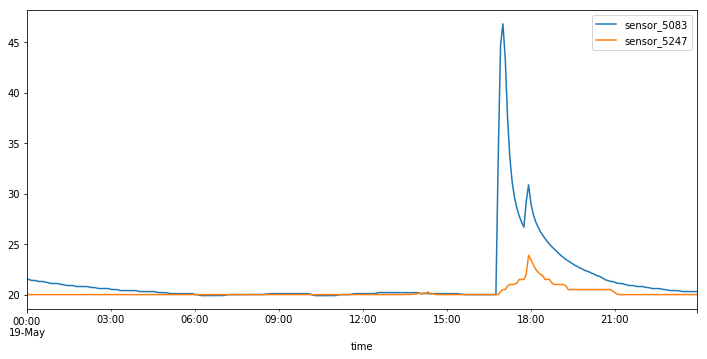

In [15]:
fig, ax = plt.subplots(figsize=(12,5.5))

idx = (ts_combined.index >= '2017-05-19') & (ts_combined.index < '2017-05-20')

ts_combined[idx].plot(ax=ax);